In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = sns.load_dataset('tips')
sns.set_theme()  #setting default theme

In [2]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:ylabel='total_bill'>

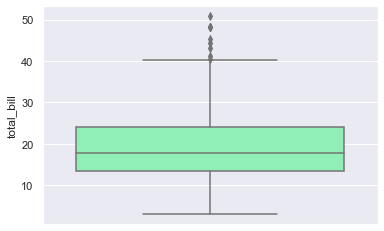

In [3]:
sns.boxplot(y= 'total_bill', palette= 'rainbow',data=df)

<AxesSubplot:ylabel='tip'>

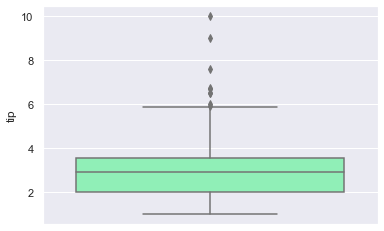

In [4]:
sns.boxplot(y= 'tip', palette= 'rainbow',data=df)

In [5]:
df1 = df
df1['sex'] = df1['sex'].replace({'Female':0,'Male':1})
#Female -->>>0        same for folowing NO --->>> 0
#Male --->>> 1                          Yes --->>> 1
df1['smoker'] = df1['smoker'].replace({'No':0,'Yes':1})

df1['time'] = df1['time'].replace({'Lunch':0,'Dinner':1})
# lunnch -->>> 0, dinner--->>> 1

In [6]:
df1 = pd.get_dummies(df,columns=['day'])
df1

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,1,2,0,0,0,1
1,10.34,1.66,1,0,1,3,0,0,0,1
2,21.01,3.50,1,0,1,3,0,0,0,1
3,23.68,3.31,1,0,1,2,0,0,0,1
4,24.59,3.61,0,0,1,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,3,0,0,1,0
240,27.18,2.00,0,1,1,2,0,0,1,0
241,22.67,2.00,1,1,1,2,0,0,1,0
242,17.82,1.75,1,0,1,2,0,0,1,0


# Outlier removing

In [7]:
print('Standard Deviation of Total Bill \n',df1.total_bill.std())

Standard Deviation of Total Bill 
 8.902411954856856


In [8]:
print('Mean of Total Bill \n',df1.total_bill.mean())

Mean of Total Bill 
 19.785942622950824


-2.8224999999999945 	 40.29749999999999


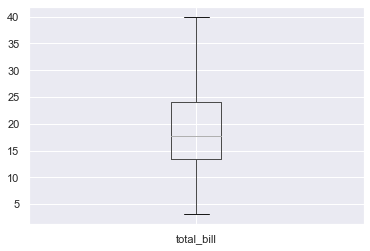

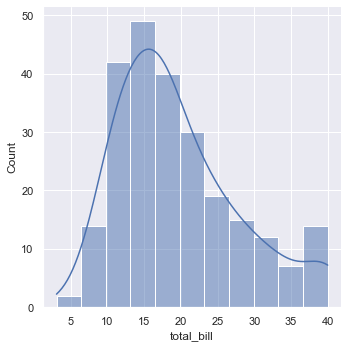

In [9]:
#total bill

IQR1=df1.total_bill.quantile(0.75)-df1.total_bill.quantile(0.25)

lower_limit=df1['total_bill'].quantile(0.25)-(IQR1*1.5)
upper_limit=df1['total_bill'].quantile(0.75)+(IQR1*1.5)
print(lower_limit, "\t",upper_limit)

data = df1.copy()

data.loc[data['total_bill']>= 39.99625,'total_bill']= 39.99625

data.loc[data['total_bill']<=-2.75375 ,'total_bill']=-2.75375 
figure=data.boxplot(column="total_bill")
sns.displot(data=data,x = 'total_bill',kde = True)

-0.3437499999999991 	 5.906249999999998


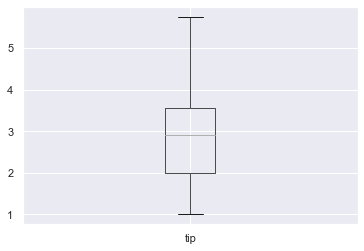

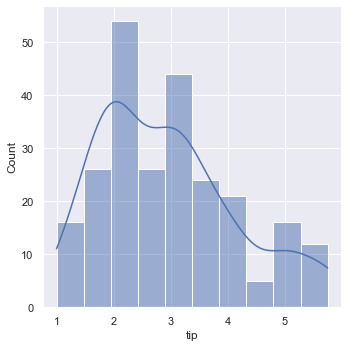

In [10]:
# tip

IQR2=df1.tip.quantile(0.75)-df1.tip.quantile(0.25)

lower_limit1=df1['tip'].quantile(0.25)-(IQR2*1.5)
upper_limit1=df1['tip'].quantile(0.75)+(IQR2*1.5)
print(lower_limit1, "\t",upper_limit1)

data1 = data.copy()

data1.loc[data1['tip']>= 5.75,'tip']=5.75

data1.loc[data1['tip']<=-0.25  ,'tip']=-0.25  
figure=data1.boxplot(column="tip")
sns.displot(data=data1,x = 'tip',kde = True)

In [11]:
data1

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,1,2,0,0,0,1
1,10.34,1.66,1,0,1,3,0,0,0,1
2,21.01,3.50,1,0,1,3,0,0,0,1
3,23.68,3.31,1,0,1,2,0,0,0,1
4,24.59,3.61,0,0,1,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.75,1,0,1,3,0,0,1,0
240,27.18,2.00,0,1,1,2,0,0,1,0
241,22.67,2.00,1,1,1,2,0,0,1,0
242,17.82,1.75,1,0,1,2,0,0,1,0


In [12]:
data1.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'time', 'size', 'day_Thur',
       'day_Fri', 'day_Sat', 'day_Sun'],
      dtype='object')

In [13]:
col =['total_bill', 'tip','size']
df2 = data[col]
col2 = ['sex','smoker','size','day_Thur','day_Fri','day_Sat','day_Sun']
df3 = data1[col2]
df3

,sex,smoker,size,day_Thur,day_Fri,day_Sat,day_Sun
0,0,0,2,0,0,0,1
1,1,0,3,0,0,0,1
2,1,0,3,0,0,0,1
3,1,0,2,0,0,0,1
4,0,0,4,0,0,0,1
...,...,...,...,...,...,...,...
239,1,0,3,0,0,1,0
240,0,1,2,0,0,1,0
241,1,1,2,0,0,1,0
242,1,0,2,0,0,1,0


In [48]:
from sklearn.preprocessing import StandardScaler
Scaled = StandardScaler()
X_scaled = Scaled.fit_transform(df2)
scaled_df = pd.DataFrame(X_scaled, columns= [col])

data2 = pd.concat([scaled_df,df3],axis=1)
data2

,"(total_bill,)","(tip,)","(size,)",sex,smoker,size,day_Thur,day_Fri,day_Sat,day_Sun
0,-0.311789,-1.439947,-0.600193,0,0,2,0,0,0,1
1,-1.112375,-0.969205,0.453383,1,0,3,0,0,0,1
2,0.172175,0.363356,0.453383,1,0,3,0,0,0,1
3,0.493613,0.225754,-0.600193,1,0,2,0,0,0,1
4,0.603167,0.443020,1.506958,0,0,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,1.137693,2.115963,0.453383,1,0,3,0,0,1,0
240,0.914974,-0.722971,-0.600193,0,1,2,0,0,1,0
241,0.372020,-0.722971,-0.600193,1,1,2,0,0,1,0
242,-0.211866,-0.904026,-0.600193,1,0,2,0,0,1,0


In [60]:
x = data2.drop(['smoker'],axis=1)
y = df3['smoker']

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [62]:
x_train

,"(total_bill,)","(tip,)","(size,)",sex,size,day_Thur,day_Fri,day_Sat,day_Sun
61,-0.694625,-0.722971,-0.600193,1,2,0,0,1,0
146,-0.113147,-1.186471,0.453383,0,3,1,0,0,0
52,1.833541,1.594526,1.506958,0,4,0,0,0,1
66,-0.376799,-0.382589,-0.600193,0,2,0,0,1,0
26,-0.747596,-0.722971,-0.600193,1,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...
67,-1.987602,-1.447189,-1.653768,0,1,0,0,1,0
192,1.066664,-0.317409,-0.600193,1,2,1,0,0,0
117,-1.075054,-1.085080,-0.600193,0,2,1,0,0,0
47,1.543404,2.173900,1.506958,1,4,0,0,0,1


In [63]:
x_test

,"(total_bill,)","(tip,)","(size,)",sex,size,day_Thur,day_Fri,day_Sat,day_Sun
64,-0.239555,-0.259472,0.453383,1,3,0,0,1,0
63,-0.155283,0.551652,1.506958,1,4,0,0,1,0
55,-0.010816,0.370598,-0.600193,1,2,0,0,0,1
111,-1.484376,-1.447189,-1.653768,0,1,0,0,1,0
225,-0.398469,-0.360862,-0.600193,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
90,1.130470,0.001247,-0.600193,1,2,0,1,0,0
101,-0.505615,0.001247,-0.600193,0,2,0,1,0,0
75,-1.091909,-1.266135,-0.600193,1,2,0,0,1,0
4,0.603167,0.443020,1.506958,0,4,0,0,0,1


In [64]:
y_train

61     1
146    0
52     0
66     0
26     0
      ..
67     1
192    1
117    0
47     0
172    1
Name: smoker, Length: 170, dtype: int64

In [65]:
y_test

64     0
63     1
55     0
111    0
225    1
      ..
90     1
101    1
75     0
4      0
109    1
Name: smoker, Length: 74, dtype: int64

In [75]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [77]:
lm.coef_

array([ 0.12626593, -0.02574205, -0.04571215, -0.02868147, -0.04338764,
       -0.1542055 ,  0.24811382,  0.05023017, -0.14413849])

In [78]:
lm.intercept_

0.5243209900461658

In [79]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

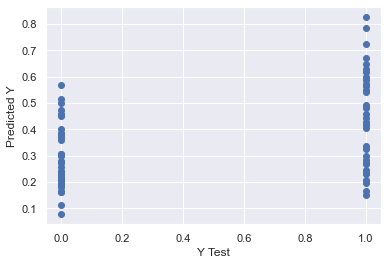

In [83]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [86]:
r_sq = lm.score(x_test,y_pred)
r_sq

1.0